🔄 Layout'lar hesaplanıyor... / Computing layouts...
✅ Görsel kaydedildi: kececi_edge_comparison4.png
✅ Visual saved: kececi_edge_comparison4.png


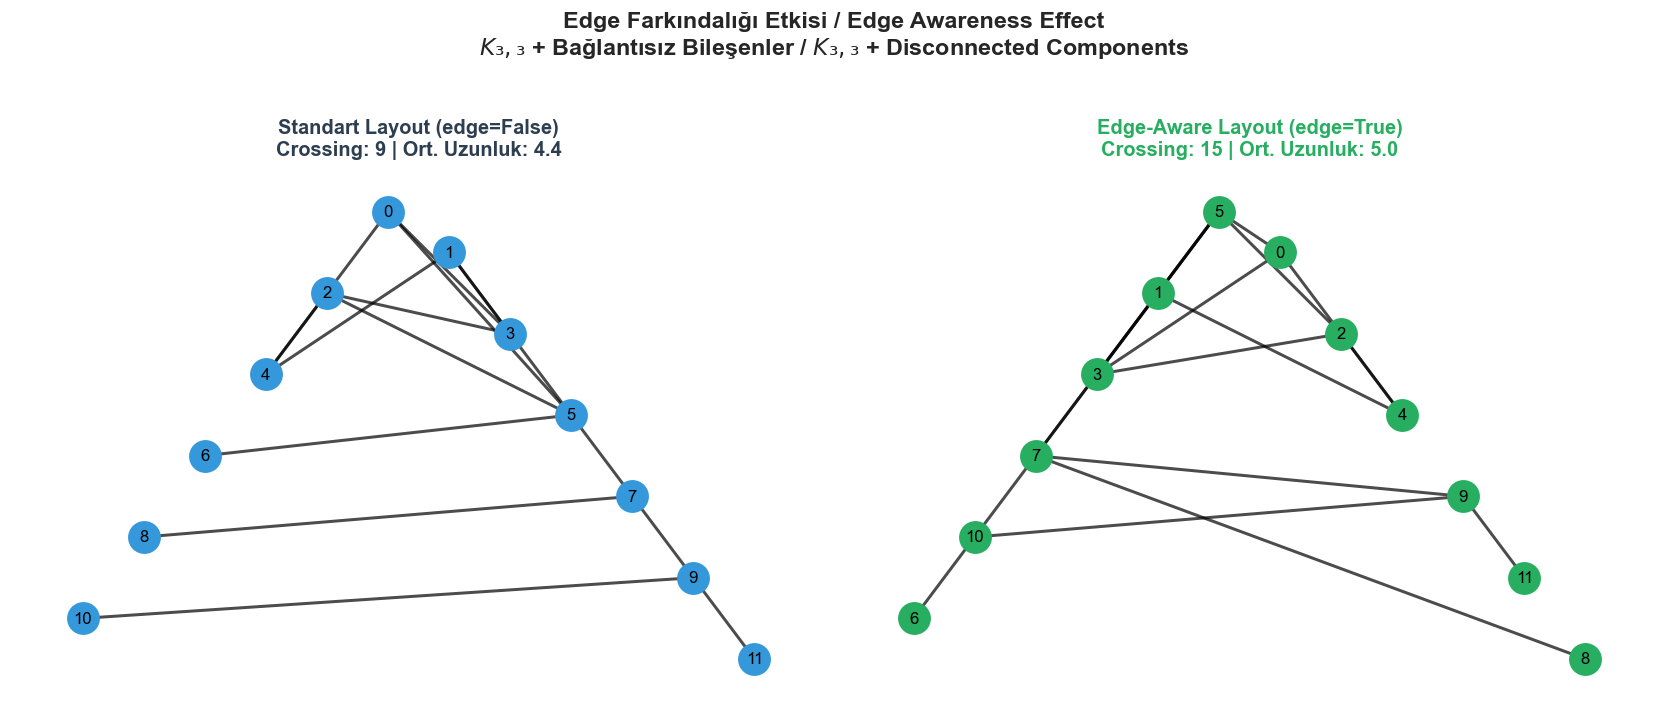

In [1]:
import time
import math
import matplotlib.pyplot as plt
import networkx as nx
import kececilayout as kl  # pip install kececilayout

# ==============================================================================
# 1. TEST GRAFİĞİ OLUŞTUR / CREATE TEST GRAPH
# ==============================================================================
# Non-planar grafik: K₃,₃ + bağlantısız bileşenler
# Non-planar graph: K₃,₃ + disconnected components
G = nx.complete_bipartite_graph(3, 3)
for i in range(6, 12):
    G.add_node(i)
    G.add_edge(i, i - (1 if i % 2 == 0 else 2))

# ==============================================================================
# 2. LAYOUT HESAPLAMA / COMPUTE LAYOUTS
# ==============================================================================
print("🔄 Layout'lar hesaplanıyor... / Computing layouts...")
pos_basic = kl.kececi_layout_edge(G, edge=False)   # Basit mod / Basic mode
pos_aware = kl.kececi_layout_edge(G, edge=True)    # Edge-aware mod / Edge-aware mode
edges = list(G.edges())

# ==============================================================================
# 3. METRİK HESAPLAMA / CALCULATE METRICS
# ==============================================================================
cross_basic = kl.count_edge_crossings(pos_basic, edges)
cross_aware = kl.count_edge_crossings(pos_aware, edges)
len_basic = kl.avg_edge_length(pos_basic, edges)
len_aware = kl.avg_edge_length(pos_aware, edges)

# ==============================================================================
# 4. GÖRSEL KARŞILAŞTIRMA / VISUAL COMPARISON
# ==============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=120)

# Sol: Basit layout / Left: Basic layout
nx.draw_networkx_nodes(G, pos_basic, ax=ax1, node_size=350, node_color='#3498db')
nx.draw_networkx_edges(G, pos_basic, ax=ax1, alpha=0.7, width=1.8)
nx.draw_networkx_labels(G, pos_basic, ax=ax1, font_size=10)
ax1.set_title(
    f"Standart Layout (edge=False)\n"
    f"Crossing: {cross_basic} | Ort. Uzunluk: {len_basic:.1f}",
    fontsize=12, fontweight='bold', color='#2c3e50'
)
ax1.set_axis_off()

# Sağ: Edge-aware layout / Right: Edge-aware layout
nx.draw_networkx_nodes(G, pos_aware, ax=ax2, node_size=350, node_color='#27ae60')
nx.draw_networkx_edges(G, pos_aware, ax=ax2, alpha=0.7, width=1.8)
nx.draw_networkx_labels(G, pos_aware, ax=ax2, font_size=10)
ax2.set_title(
    f"Edge-Aware Layout (edge=True)\n"
    f"Crossing: {cross_aware} | Ort. Uzunluk: {len_aware:.1f}",
    fontsize=12, fontweight='bold', color='#27ae60'
)
ax2.set_axis_off()

plt.suptitle(
    "Edge Farkındalığı Etkisi / Edge Awareness Effect\n"
    "$K₃,₃$ + Bağlantısız Bileşenler / $K₃,₃$ + Disconnected Components",
    fontsize=14, fontweight='bold', y=0.99
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('kececi_edge_comparison4.png', dpi=150, bbox_inches='tight')
print("✅ Görsel kaydedildi: kececi_edge_comparison4.png")
print("✅ Visual saved: kececi_edge_comparison4.png")
plt.show()